### SVM(Support Vector Machine)
- 선을 구성하는 매개변수를 조정해서 요소들을 구분하는 선을 찾고 이를 기반으로 패턴을 인식 
- 패턴들과의 거리(Margin)을 최대로 만드는 것이 가장 좋은 결과을 얻음.

### SVM을 활용한 비만도(BMI) 측정 예측
- BMI = 몸무게(Kg) / 신장(m)*신장(m)
- BMI가 18.5이상 25미만일때 표준 몸무게 

#### BMI Data 생성
- 데이터 획득을 위해 무작위로 2만명 데이터를 생성
- 키(cm), 몸무게(kg), Target(저체중(thin), 정상체중(Normal), 비만(fat))

In [2]:
import numpy as np
import random
np.random.seed(42)

In [3]:
def calc_bmi(h, w):
    result = ""
    bmi = w / (h/100)**2
    if bmi < 18.5: result = "thin"
    elif bmi < 25: result = "normal"
    else: result = "fat"
    return result

In [4]:
calc_bmi(170, 72)

'normal'

In [5]:
# 저장파일 준비하기
fp = open("../Data/bmi.csv", "w", encoding="utf-8")
fp.write("height,weight,label\n")
# 무작위로 데이터 생성하기
cnt = {"thin":0, "normal":0, "fat":0}
for i in range(20000):
    h = np.random.randint(120, 200)
    w = np.random.randint(35, 80)
    label = calc_bmi(h,w)
    cnt[label]+=1
    fp.write(f"{h},{w},{label}\n")
fp.close()
print("OK", cnt)

OK {'thin': 6338, 'normal': 6045, 'fat': 7617}


### BMI공식을 사용하지 않고 BMI 예측

In [7]:
import pandas as pd

In [8]:
tbl = pd.read_csv("../Data/bmi.csv")
tbl.head()

,height,weight,label
0,171,63,normal
1,134,77,fat
2,191,55,thin
3,194,45,thin
4,143,37,thin


In [9]:
tbl.shape

(20000, 3)

In [10]:
tbl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   height  20000 non-null  int64 
 1   weight  20000 non-null  int64 
 2   label   20000 non-null  object
dtypes: int64(2), object(1)
memory usage: 468.9+ KB


In [11]:
tbl.describe()

,height,weight
count,20000.000000,20000.000000
mean,159.455500,57.050800
std,23.091948,12.928626
min,120.000000,35.000000
25%,139.000000,46.000000
50%,160.000000,57.000000
75%,179.000000,68.000000
max,199.000000,79.000000


### 정규화
: 컬럼별로 최대값을 구해 최대값을 1로 만드는 작업 

In [12]:
w = tbl.weight / tbl.weight.max()
h = tbl.height / tbl.height.max()
lab = tbl.label

In [15]:
# Feature Data
wh = pd.concat(
    [w,h],
    axis='columns'
)
wh

,weight,height
0,0.797468,0.859296
1,0.974684,0.673367
2,0.696203,0.959799
3,0.569620,0.974874
4,0.468354,0.718593
...,...,...
19995,0.810127,0.618090
19996,0.810127,0.829146
19997,0.898734,0.663317
19998,0.569620,0.869347


In [16]:
# Train과 Test로 나누기
from sklearn.model_selection import train_test_split

In [17]:
train_data, test_data, train_target, test_target = \
                    train_test_split(
                        wh,
                        lab,
                        random_state=42,
                        stratify=lab
                    )

In [18]:
from sklearn import svm

In [19]:
clf = svm.SVC()

In [20]:
# 학습 시키기
clf.fit(train_data, train_target)

SVC()

In [21]:
# 검증하기
print("Train :", clf.score(train_data, train_target))
print("Test  :", clf.score(test_data, test_target))

Train : 0.9966
Test  : 0.9944


### 데이터 시각화

In [22]:
tbl.head()

,height,weight,label
0,171,63,normal
1,134,77,fat
2,191,55,thin
3,194,45,thin
4,143,37,thin


In [24]:
tbl.set_index("label", inplace=True)
tbl.head()

,height,weight
label,,
normal,171,63
fat,134,77
thin,191,55
thin,194,45
thin,143,37


In [25]:
import matplotlib.pyplot as plt

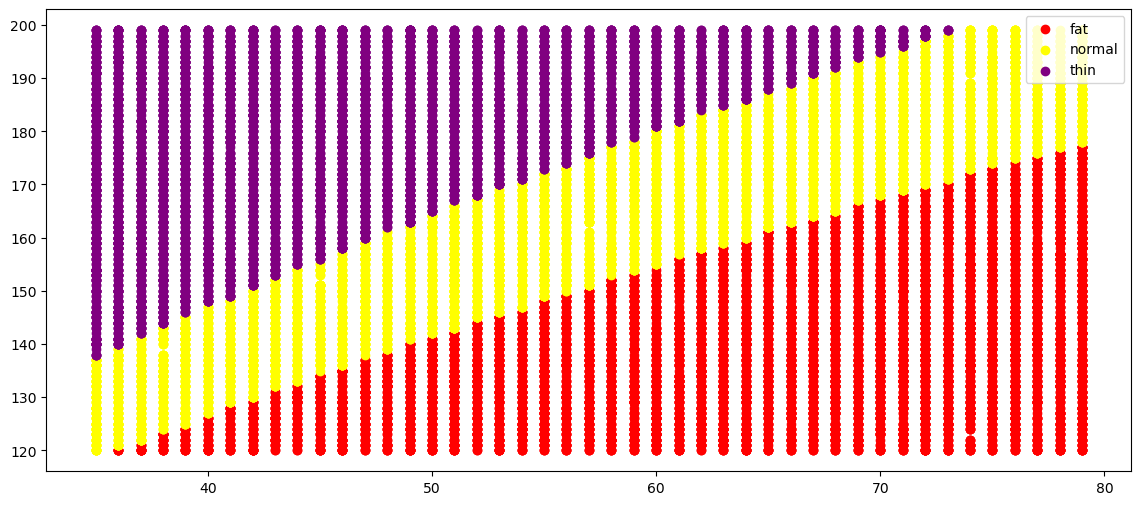

In [26]:
fig = plt.figure(figsize=(14,6))
ax = fig.add_subplot(1,1,1)

def scatter1(lbl, color):
    b = tbl.loc[lbl,:]
    ax.scatter(
        b.weight,
        b.height,
        c=color,
        label=lbl
    )

scatter1("fat", "red")
scatter1("normal", "yellow")
scatter1("thin", 'purple')

ax.legend()
plt.show()